In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
# import networkx as nx
import numpy as np
import cvxpy as cvx
from pprint import pprint
from random import shuffle
import time
from contagion import binarize_probabilities, distribute_liabilities, make_connections, DeterministicRatioNetwork

In [3]:
defaults_to_freq = {}

for _ in range(10000):
    cash_vector = np.random.normal(10000, 10000, 100)
    cash_vector[cash_vector <= 0] = 1*10**-10
    # cash_vector[cash_vector > 5000] = 6500
    cash_to_connectivity = lambda x: np.log(x).astype(int)
    connectivity_vector = cash_to_connectivity(cash_vector)
    
    # Make the adjacency matrix
    mat = make_connections(connectivity_vector)
    mat = binarize_probabilities(mat)

    # Distribute liabilities
    leverage_ratios = np.random.normal(10, 2, 100)
    leverage_ratios[leverage_ratios < 5] = 5

    liabilities = np.multiply(cash_vector, leverage_ratios)
    mat = distribute_liabilities(mat, liabilities)
    for i, cash in enumerate(cash_vector):
        mat[i, i] = cash
    model = DeterministicRatioNetwork(100, mat)
    model.reset_net()

    ratios, defaults = model.step()
    if defaults in defaults_to_freq:
        defaults_to_freq[defaults] += 1
    else:
        defaults_to_freq[defaults] = 1

KeyboardInterrupt: 

In [ ]:
defaults_to_freq

<IPython.core.display.Javascript object>


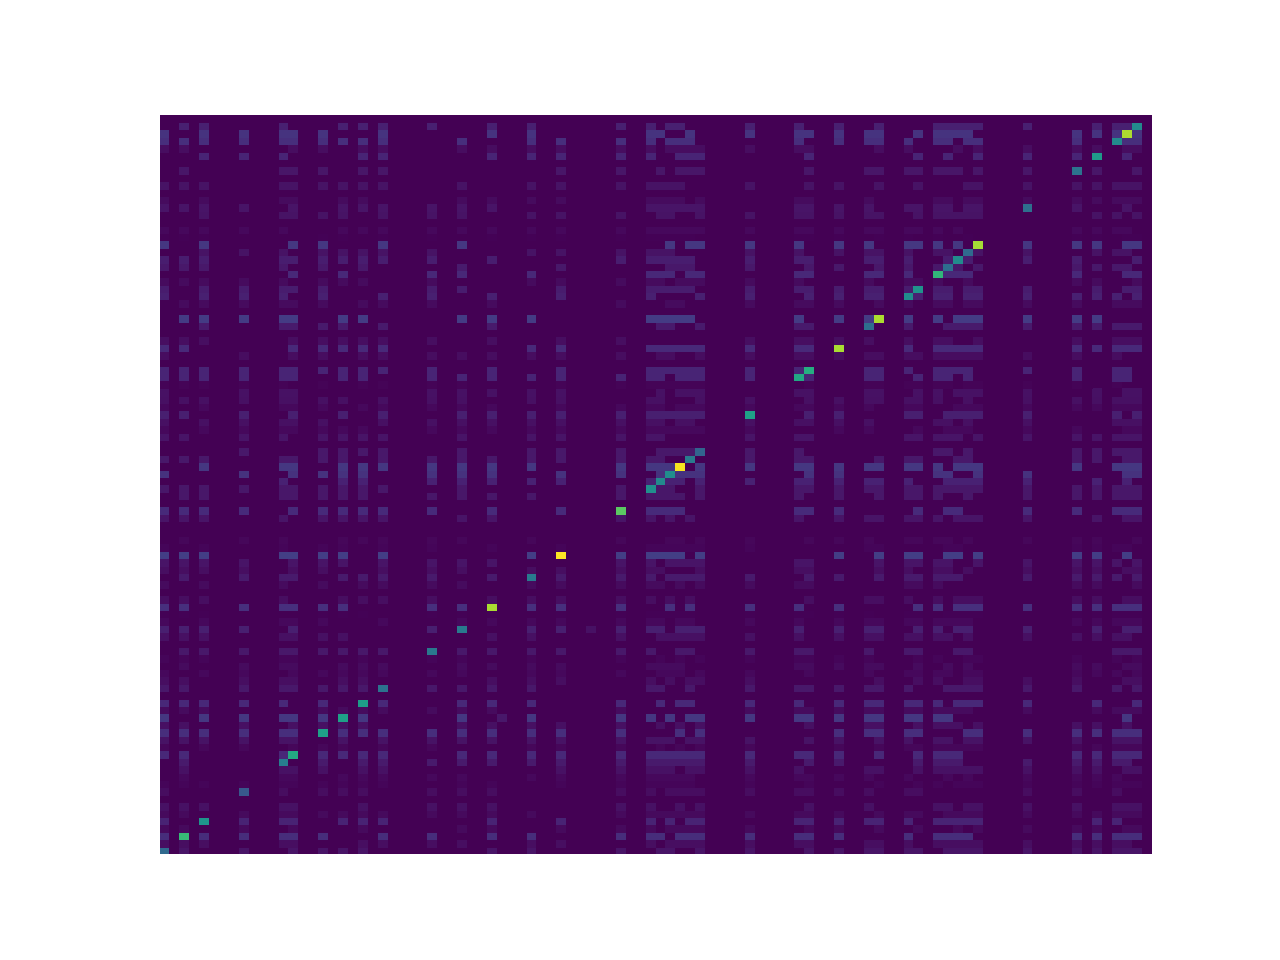

In [4]:
model = DeterministicRatioNetwork(100, mat)
f, ax = plt.subplots()
def data_gen():
    while True:
        yield mat
def animate(i):
    model.step()
    data = model.liabilities
    plt.pcolor(np.array(data))
ani = animation.FuncAnimation(f, animate, data_gen, interval=100)
plt.show()

<IPython.core.display.Javascript object>


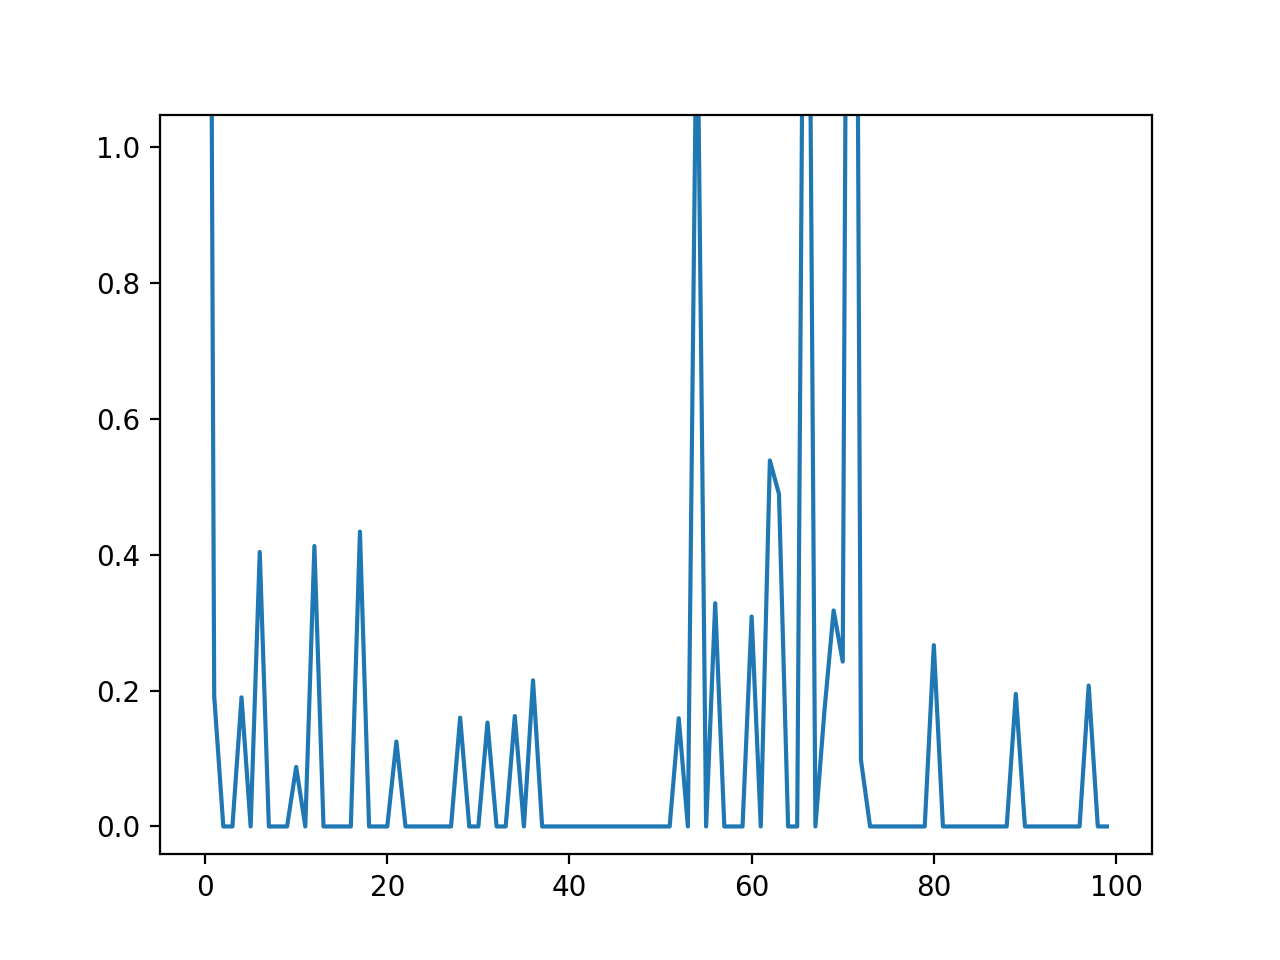

In [4]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(100))
# ax.set_ylim(0, 1)

model = DeterministicRatioNetwork(100, mat)
defaults_to_freq = {}


def update(data):
    ratios = data[0]
    defaults = data[1]
    if defaults in defaults_to_freq:
        defaults_to_freq[defaults] += 1
    else:
        defaults_to_freq[defaults] = 1
    line.set_ydata(ratios)
    return line,


def data_gen():
    for i in xrange(1000):
        yield model.step()

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()